In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('20newsgroups.csv')

In [43]:
data

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [44]:
X = data.text
y = data.target

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 200, random_state = 123, stratify = y)

In [47]:
import numpy as np

In [48]:
len(np.unique(y_train))

20

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfIdf = TfidfVectorizer()

In [55]:
X_train = tfIdf.fit_transform(X_train)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33212 stored elements and shape (200, 12523)>

In [52]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(X_train)

,n_clusters,20
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [62]:
import numpy as np
len(np.unique(kmeans.labels_))

20

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
ac = AgglomerativeClustering(n_clusters = 20, linkage = 'average', compute_distances = True)

In [68]:
ac.fit(X_train.toarray())

,n_clusters,20
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,True


In [72]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [76]:
kmeans_sil = silhouette_score(X_train, kmeans.labels_)
print(f'Silueta za kmeans = {kmeans_sil}')

ac_sil = silhouette_score(X_train, ac.labels_)
print(f'Silueta za hijerarhijsko = {ac_sil}')

print(kmeans_sil - ac_sil)

Silueta za kmeans = 0.011436419336336648
Silueta za hijerarhijsko = 0.011880616416895964
-0.0004441970805593165


In [77]:
# vrednosti nisu dobre, jer su jako male
# bolje je hijerarshijsko klasteovanje
# idealna je ona blizu 1
# nije adekvatna mera, jer su podaci tekstualni tj. visedimenzionalni su, klase se semanticki preklapaju, klasteri nisu globularni

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components = 2)

In [80]:
pca.fit(X_train)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [81]:
X_train = pca.transform(X_train)

In [82]:
pca.explained_variance_ratio_.sum()

np.float64(0.03108471887039853)

In [83]:
from matplotlib import pyplot as plt

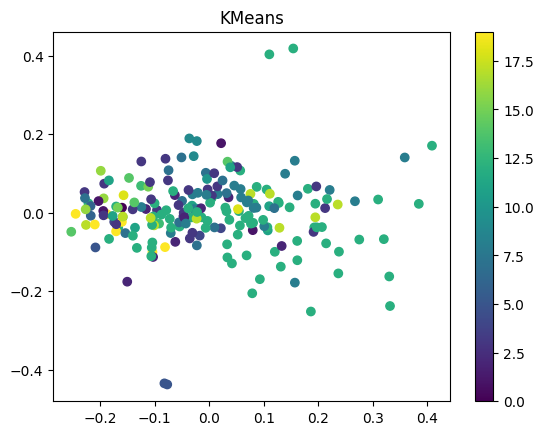

In [87]:
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c = kmeans.labels_)
plt.title('KMeans')
plt.colorbar()
plt.show()

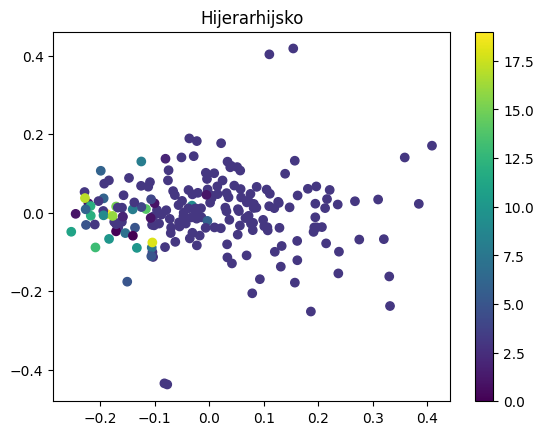

In [88]:
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c = ac.labels_)
plt.title('Hijerarhijsko')
plt.colorbar()
plt.show()

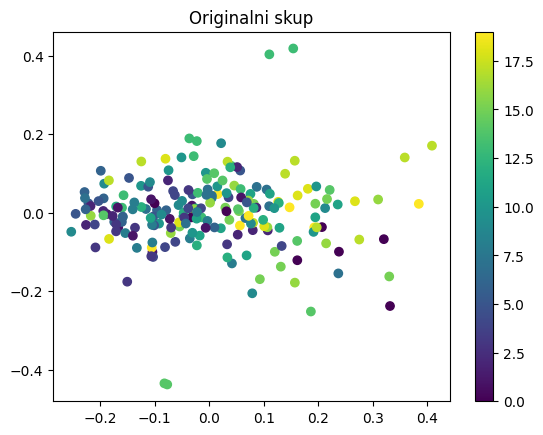

In [89]:
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.title('Originalni skup')
plt.colorbar()
plt.show()

In [ ]:
# klasteri se ne poklapaju dobro sa originalnim, jer se radi o tekstualnim podacima koji su semanticki dosta slicni